## Association Rule - Book Dataset

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [2]:
book = pd.read_csv("book.csv")

In [3]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


#### Lets apply apriori algorithm 

In [25]:
freq_items= apriori(book,min_support=0.05,max_len=3,use_colnames=True)

In [26]:
freq_items.sort_values('support',ascending=False,inplace=True)

In [28]:
freq_items.head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(ChildBks, CookBks)"


In [29]:
freq_items.tail()

,support,itemsets
75,0.0565,"(RefBks, GeogBks, ArtBks)"
70,0.0565,"(CookBks, ArtBks, ItalCook)"
34,0.0565,"(ItalCook, ArtBks)"
72,0.0535,"(DoItYBks, RefBks, ArtBks)"
52,0.0525,"(ChildBks, GeogBks, ItalCook)"


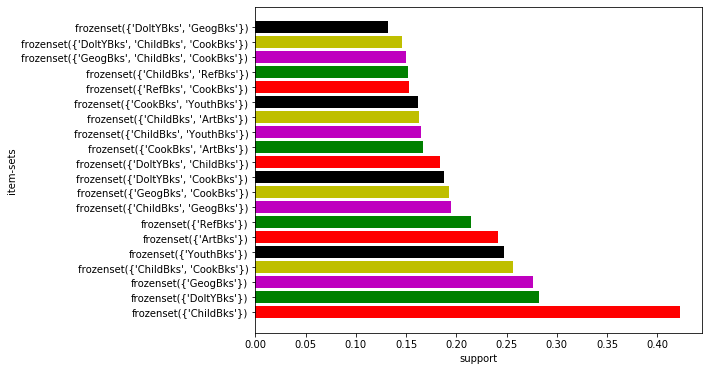

In [30]:
plt.figure(figsize=(8,6))
plt.barh(y = list(range(1,21)),width = freq_items.support[1:21],color='rgmyk');
plt.yticks(list(range(1,21)),freq_items.itemsets[1:21],rotation=0)
plt.ylabel('item-sets');
plt.xlabel('support');

### Lets create rules with metric as lift 

In [31]:
rules = association_rules(freq_items,metric='lift',min_threshold=1)

In [32]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
4,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


In [33]:
rules.sort_values('lift',ascending=False,inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
235,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
238,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
279,(ItalCook),"(CookBks, ArtBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
274,"(CookBks, ArtBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
220,"(GeogBks, CookBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025


#### from above df we can see that there are lot of redundancy among rules, so lets remove them

In [34]:
def to_list(i):
    return (sorted(list(i)))

In [35]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [36]:
ma_X = ma_X.apply(sorted)

In [37]:
rules_sets = list(ma_X)

In [38]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [39]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [40]:
rules_no_redudancy  = rules.iloc[index_rules,:]

In [41]:
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
235,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
279,(ItalCook),"(CookBks, ArtBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
220,"(GeogBks, CookBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
159,(ItalCook),"(ChildBks, CookBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
242,"(DoItYBks, CookBks)",(ItalCook),0.1875,0.1135,0.0585,0.312000,2.748899,0.037219,1.288517
293,(ItalCook),"(ChildBks, GeogBks)",0.1135,0.1950,0.0525,0.462555,2.372077,0.030367,1.497828
170,(RefBks),"(ChildBks, YouthBks)",0.2145,0.1650,0.0830,0.386946,2.345130,0.047608,1.362034
260,(RefBks),"(DoItYBks, YouthBks)",0.2145,0.1155,0.0580,0.270396,2.341093,0.033225,1.212302
216,"(ArtBks, YouthBks)",(GeogBks),0.1010,0.2760,0.0650,0.643564,2.331755,0.037124,2.031222
62,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406


#### From above rules if we observe top 5 rules ItlaCook is going hand in hand with Cookbks. May be we comeup with rules like below
#### A discount on "ItalCook" on purchase of combos[(CookBks, YouthBks),(CookBks, ArtBks),(GeogBks, CookBks),(ChildBks, CookBks),(DoItYBks, CookBks)]

In [42]:
support=rules.as_matrix(columns=['support']);
confidence=rules.as_matrix(columns=['confidence']);

C:\Users\ABHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ABHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


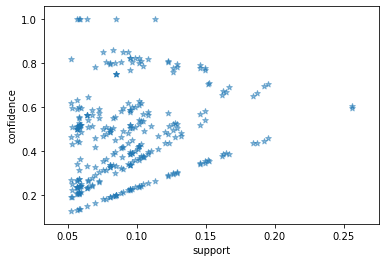

In [43]:
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence');